# My Stock Analysis and Model

In [7]:
# Packages installed: pillow, kiwisolver, cycler, scipy, matplotlib, seaborn, numpy, pandas, sklearn, yahoo_fin
# Run the commands below to install packages. 
# import sys
# !{sys.executable} -m pip install yahoo_fin

In [37]:
# Raw Package
import numpy as np
import pandas as pd
import random

# Data Source
import yfinance as yf
from yahoo_fin import stock_info as si

# Data viz
import seaborn as sns
from matplotlib import pyplot as plt

# Regression Model
from sklearn.linear_model import LinearRegression

# Model tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Exploring the yf library

* With Simple Visualization and Modeling (Linear Regression)

In [3]:
#Interval required 5 minutes
tesla_data = yf.download(tickers='Tsla', period='5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
tesla_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-21,41.689999,42.445999,41.481998,41.540001,41.540001,26038000
2016-12-22,41.644001,41.998001,41.299999,41.689999,41.689999,15555500
2016-12-23,41.599998,42.689999,41.542000,42.667999,42.667999,23352500
2016-12-27,42.976002,44.450001,42.883999,43.905998,43.905998,29578500
2016-12-28,44.306000,44.759998,43.439999,43.948002,43.948002,18912500
...,...,...,...,...,...,...
2021-12-14,945.000000,966.409973,930.000000,958.510010,958.510010,23602100
2021-12-15,953.210022,978.750000,928.250000,975.989990,975.989990,25056400
2021-12-16,994.500000,994.979980,921.849976,926.919983,926.919983,27590500


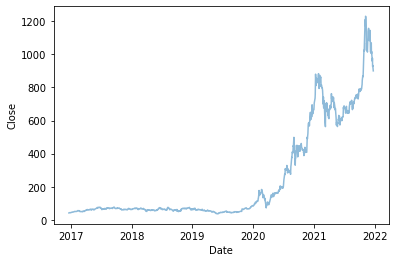

In [6]:
sns.lineplot(data=tesla_data, x=tesla_data.index, y='Close', alpha=0.5);

In [7]:
X_tesla_data = tesla_data[['Open', 'High','Low', 'Close', 'Volume']]

In [8]:
X_tesla = X_tesla_data[['Open', 'High','Low', 'Volume']]
Y_tesla = X_tesla_data['Close']
x_tesla_train, x_tesla_test, y_tesla_train, y_tesla_test = train_test_split(X_tesla, Y_tesla, test_size=0.1, random_state=42)

In [9]:
x_tesla_train

,Open,High,Low,Volume
Date,,,,
2018-10-23,52.773998,59.585999,52.419998,95139000
2020-03-17,88.001999,94.370003,79.199997,119973000
2018-05-25,55.526001,55.928001,55.122002,19375500
2021-08-19,678.210022,686.549988,667.590027,14313500
2021-12-07,1044.199951,1057.670044,1026.810059,18694900
...,...,...,...,...
2021-02-17,779.090027,799.840027,762.010010,25996500
2021-04-30,667.590027,715.469971,666.140015,40758700
2021-06-21,624.479980,631.390015,608.880005,24812700


In [10]:
x_tesla_test

,Open,High,Low,Volume
Date,,,,
2019-03-19,53.500000,54.660000,52.692001,59003000
2017-05-18,61.400002,62.787998,61.062000,28269000
2017-03-08,49.400002,50.014000,49.063999,18626000
2017-03-24,51.139999,52.778000,51.001999,28236500
2021-03-30,601.750000,637.659973,591.010010,39432400
...,...,...,...,...
2020-12-10,574.369995,627.750000,566.340027,67083200
2021-06-04,579.710022,600.609985,577.200012,24036900
2017-06-06,68.940002,71.898003,67.994003,55434000


In [11]:
tesla_model = LinearRegression()

In [12]:
tesla_model.fit(x_tesla_train, y_tesla_train)

LinearRegression()

In [13]:
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

In [14]:
x_tesla_train_rmse = rmse(y_tesla_train, tesla_model.predict(x_tesla_train))
x_tesla_train_rmse

5.023126152099139

In [15]:
x_tesla_test_rmse = rmse(y_tesla_test, tesla_model.predict(x_tesla_test))
x_tesla_test_rmse

5.077365757105657

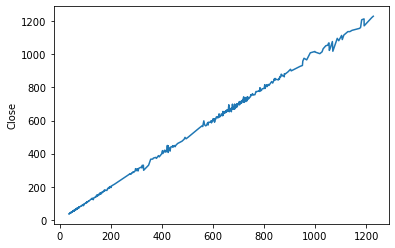

In [16]:
sns.lineplot(x=tesla_model.predict(x_tesla_train), y=y_tesla_train, alpha=1);

In [17]:
tesla_df = pd.DataFrame({"Actual":y_tesla_test, "Predicted": tesla_model.predict(x_tesla_test)})

In [18]:
tesla_df

,Actual,Predicted
Date,,
2019-03-19,53.493999,53.837509
2017-05-18,62.612000,62.285259
2017-03-08,49.374001,49.615519
2017-03-24,52.632000,52.413192
2021-03-30,635.619995,625.331833
...,...,...
2020-12-10,627.070007,615.699908
2021-06-04,599.049988,595.711769
2017-06-06,70.570000,70.775281


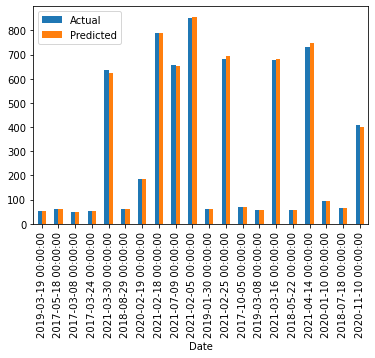

In [19]:
tesla_df.head(20).plot(kind='bar');

# Now lets try Microsoft 
* With some feature enginearing

In [2]:
msft = yf.Ticker("MSFT")
msft_data = yf.download(tickers='MSFT', period='19y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [21]:
msft_div = pd.DataFrame(msft.dividends)
msft_div

,Dividends
Date,
2003-02-19,0.08
2003-10-15,0.16
2004-08-23,0.08
2004-11-15,3.08
2005-02-15,0.08
...,...
2020-11-18,0.56
2021-02-17,0.56
2021-05-19,0.56


In [22]:
my_msft_data_frame = pd.DataFrame(msft_data.loc[msft_div.index])
my_msft_data_frame['Dividends'] = msft_div[['Dividends']]
my_msft_data_frame

,Open,High,Low,Close,Adj Close,Volume,Dividends
Date,,,,,,,
2003-02-19,24.820000,24.879999,24.170000,24.530001,15.536116,46902700,0.08
2003-10-15,29.200001,29.260000,28.700001,29.070000,18.514822,57242100,0.16
2004-08-23,27.270000,27.330000,27.120001,27.240000,17.400461,39572200,0.08
2004-11-15,27.340000,27.500000,27.200001,27.389999,19.500317,104468000,3.08
2005-02-15,26.000000,26.080000,25.860001,25.930000,18.517830,76551600,0.08
...,...,...,...,...,...,...,...
2020-11-18,213.649994,215.169998,210.929993,211.080002,209.325378,28372800,0.56
2021-02-17,241.320007,244.309998,240.940002,244.199997,242.727814,21653500,0.56
2021-05-19,239.309998,243.229996,238.600006,243.119995,242.212326,25739800,0.56


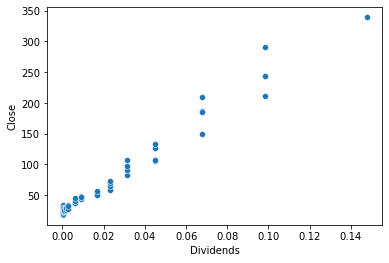

In [23]:
m_data = my_msft_data_frame[my_msft_data_frame['Dividends']<3.0]
sns.scatterplot(x=m_data['Dividends']**4, y=m_data['Close']);

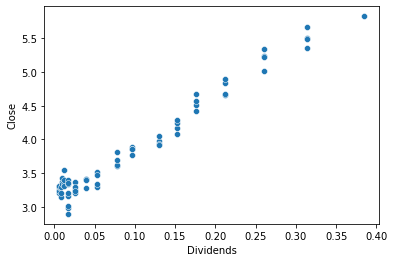

In [24]:
sns.scatterplot(x=m_data['Dividends']**2, y=np.log(m_data['Close']));

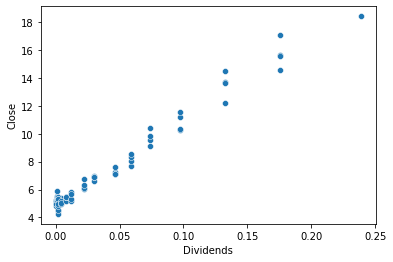

In [25]:
sns.scatterplot(x=m_data['Dividends']**3, y=np.sqrt(m_data['Close']));

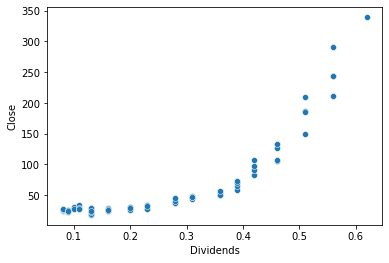

In [26]:
sns.scatterplot(x=m_data['Dividends'], y=m_data['Close']);

In [46]:
# AS it turns out these linear transformations give the best R^2 scores.

msft_model = LinearRegression()
X_msft = m_data[['Dividends']]**3
Y_msft = np.sqrt(m_data['Close'])
x_msft_train, x_msft_test, y_msft_train, y_msft_test = train_test_split(X_msft, Y_msft, test_size=0.33, random_state=42)

msft_model.fit(x_msft_train, y_msft_train)
print("Training Score: ", msft_model.score(x_msft_train, y_msft_train)), print("Testing Score: ", msft_model.score(x_msft_test, y_msft_test));


Training Score:  0.9798630941820888
Testing Score:  0.9650481817266343


**Now we have seen some microsoft data and the yf.Ticker. As well as explored how good dividends are as a predictor**

# Lets try to get data that summaraizes the market the best.

In [140]:
sns.set(rc = {'figure.figsize':(20,8)})

In [32]:
sp500 = set(si.tickers_sp500())
nasdaq = set(si.tickers_nasdaq())
dow = set(si.tickers_dow())
all_exchanges_tickers = set.union(sp500, nasdaq, dow)

A stock exchange acts as a market where stock buyers connect with stock sellers. Stocks can be traded on several exchanges.

Lets delete stocks with a bad fith letter identifier

In [29]:
bad_letters = ['W', 'R', 'P', 'Q']
del_set = set()
save_set = set()
for ticker in all_exchanges_tickers:
    if len(ticker) > 4 and ticker[-1] in bad_letters:
        del_set.add(ticker)
    else:
        save_set.add(ticker)
print(f'Removed {len(del_set)} unqualified stock symbols')
print(f'Kept {len(save_set)} qualified stock symbols')

our_tickers = save_set  

Removed 809 unqualified stock symbols
Kept 5187 qualified stock symbols


Now we have a list of tickers from all three exchanges: sp500, nasdaq, dow

In [144]:
random.seed(100)
Dates_distribution=[]

for ticker in random.sample(our_tickers, 200):
    data = yf.download(tickers=ticker, period='2y', interval='1mo').dropna()
    max_price_date = data[data['Close']==max(data['Close'])].index.astype(str)
    Dates_distribution.append(max_price_date[0])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

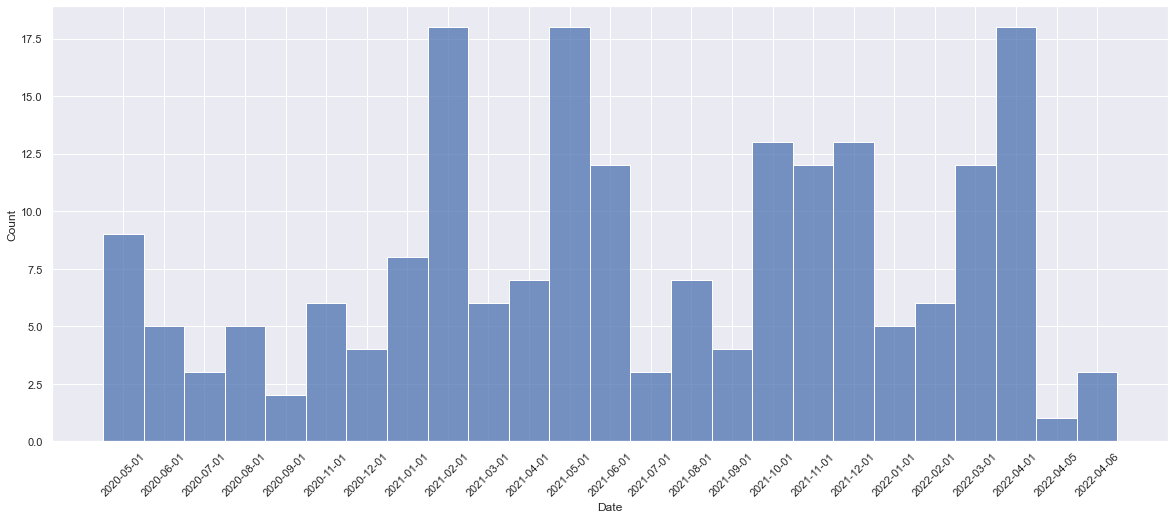

In [145]:
dist = pd.DataFrame(Dates_distribution).rename(columns={0:"Date"}).sort_values('Date')
sns.histplot(data=dist, x="Date")
plt.xticks(rotation=45);